In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime

In [95]:
#1.1
Sig_Eqs=pd.read_csv("earthquakes-2023-11-05_14-40-09_+0800.tsv",sep="\t")
#aggregate deaths by region
total=Sig_Eqs.groupby(['Country']).sum()['Deaths']
#Descending arrangement
total.sort_values(ascending=False).head(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

<Axes: xlabel='Year'>

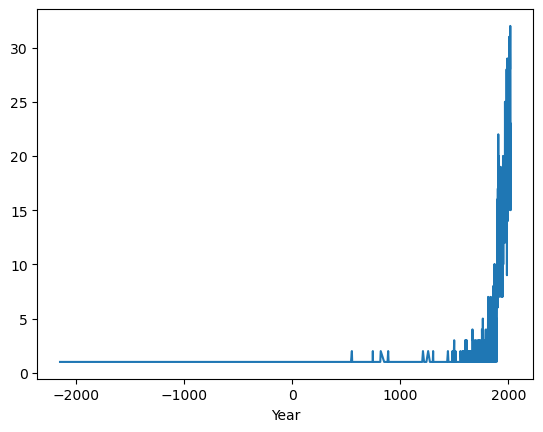

In [96]:
#1.2
Sig_Eqs['Number']=1
#The number of mag above 6
total_1=Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).sum()['Number']
total_1.plot.line()
#Earthquakes have been recorded more frequently since 1500. The reason may be the lack of documentation of previous earthquakes.

In [97]:
#1.3.1
def CountEq_LargestEq(country):  
    earthquakes = Sig_Eqs[Sig_Eqs['Country'] == country]
    #The earthquakes are ranked in descending mag order,with the first being the strongest earthquake.
    largest_earthquake = earthquakes.sort_values(by='Mag', ascending=False).iloc[0]  
    #the number of earthquakes
    count = len(earthquakes)
    return largest_earthquake['Year'],largest_earthquake['Mo'],largest_earthquake['Dy']
#Take China for example
CountEq_LargestEq("CHINA")

(1668.0, 7.0, 25.0)

In [98]:
#1.3.2
#Eliminate duplicate countries. I learned this line of code from the Internet
unique_countries = list(set(Sig_Eqs['Country']))
#Apply CountEq_LargestEq to every country in the file. I can't do descending here
for i in unique_countries:
    print(i)
    print(CountEq_LargestEq(i))

AZORES (PORTUGAL)
(1968.0, 2.0, 28.0)
CENTRAL AFRICAN REPUBLIC
(1921.0, 9.0, 16.0)
BURUNDI
(2004.0, 2.0, 24.0)
VENEZUELA
(1894.0, 4.0, 29.0)
SOUTH KOREA
(1700.0, 9.0, 12.0)
GABON
(1974.0, 9.0, 23.0)
LAOS
(2007.0, 5.0, 16.0)
TONGA
(1919.0, 4.0, 30.0)
VANUATU
(1913.0, 10.0, 14.0)
BULGARIA
(1904.0, 4.0, 4.0)
NORTH KOREA
(1518.0, 7.0, 2.0)
MONGOLIA
(1905.0, 7.0, 9.0)
GREECE
(1303.0, 8.0, 8.0)
TAIWAN
(1920.0, 6.0, 5.0)
AUSTRIA
(1590.0, 9.0, 15.0)
BARBADOS
(1831.0, 8.0, 11.0)
GRENADA
(1822.0, 12.0, 1.0)
ETHIOPIA
(1906.0, 8.0, 25.0)
CANADA
(1949.0, 8.0, 22.0)
MALAWI
(1989.0, 3.0, 10.0)
COLOMBIA
(1826.0, 6.0, 18.0)
LEBANON
(551.0, 7.0, 9.0)
KIRIBATI
(1905.0, 6.0, 30.0)
ARMENIA
(1988.0, 12.0, 7.0)
NETHERLANDS
(1992.0, 4.0, 13.0)
SAUDI ARABIA
(2009.0, 5.0, 19.0)
MADAGASCAR
(2017.0, 1.0, 11.0)
TUNISIA
(1957.0, 2.0, 20.0)
COMOROS
(2018.0, 5.0, 15.0)
SOLOMON SEA
(1895.0, 3.0, 6.0)
GERMANY
(1978.0, 9.0, 3.0)
HONDURAS
(1856.0, 8.0, 4.0)
MALAYSIA
(1976.0, 7.0, 26.0)
MEXICO
(1899.0, 1.0, 24.0)
AUSTRALI

IndexError: single positional indexer is out-of-bounds

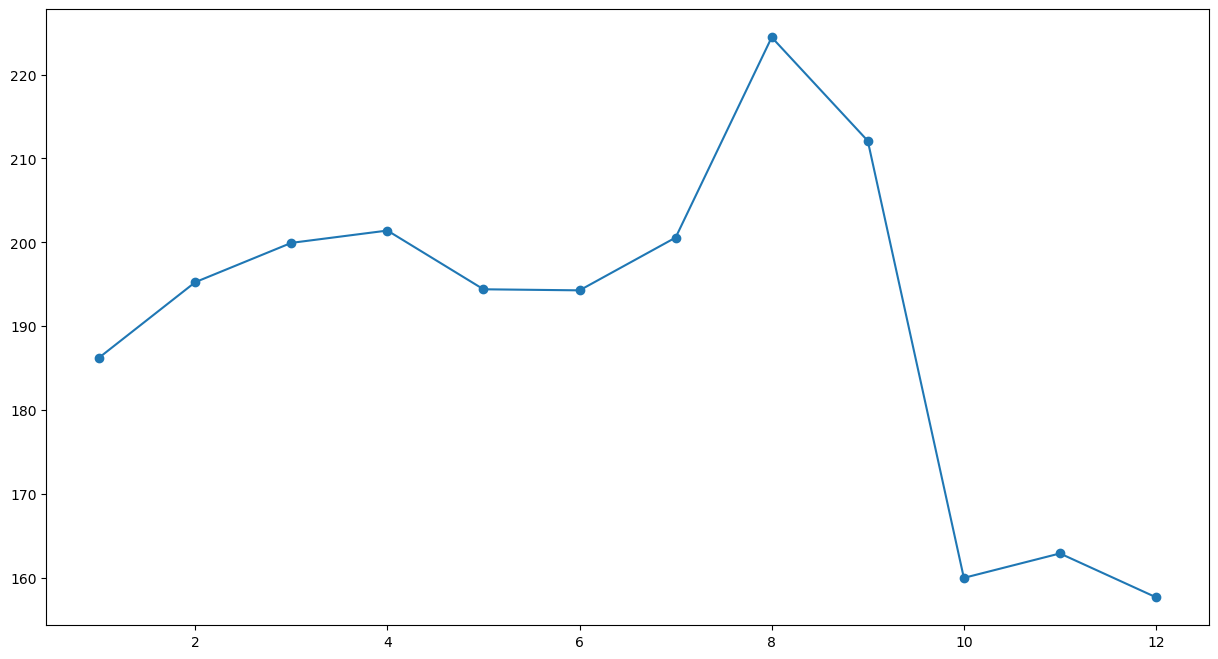

In [99]:
#2 This problem was solved by the inquiring Zhao Wangchao
data = pd.read_csv("2281305.csv")
#Null removal
data['WND'] = data['WND'].dropna()
#Separate the values of each part by ","
data['q'], data['w'], data['e'], data['r'], data['t'] = data['WND'].str.split(',').str
#The outlier 9999 is removed
data = data[data['q'] != 9999]
#Converts the date to datetime format
data["DATE"] = pd.to_datetime(data["DATE"], format="%Y-%m-%dT%H:%M:%S")  # Convert date column to datetime format
#Changing the q column value to a floating point number makes it computable
data['q'] = data['q'].astype(float)
#Monthly mean
months = data.groupby(data['DATE'].dt.month)['q'].mean()
plt.figure(figsize=(15,8))
m = range(1,13)
plt.plot(m, months, marker='o')
plt.show()
#The wind speed is higher in summer and lower in autumn and winter

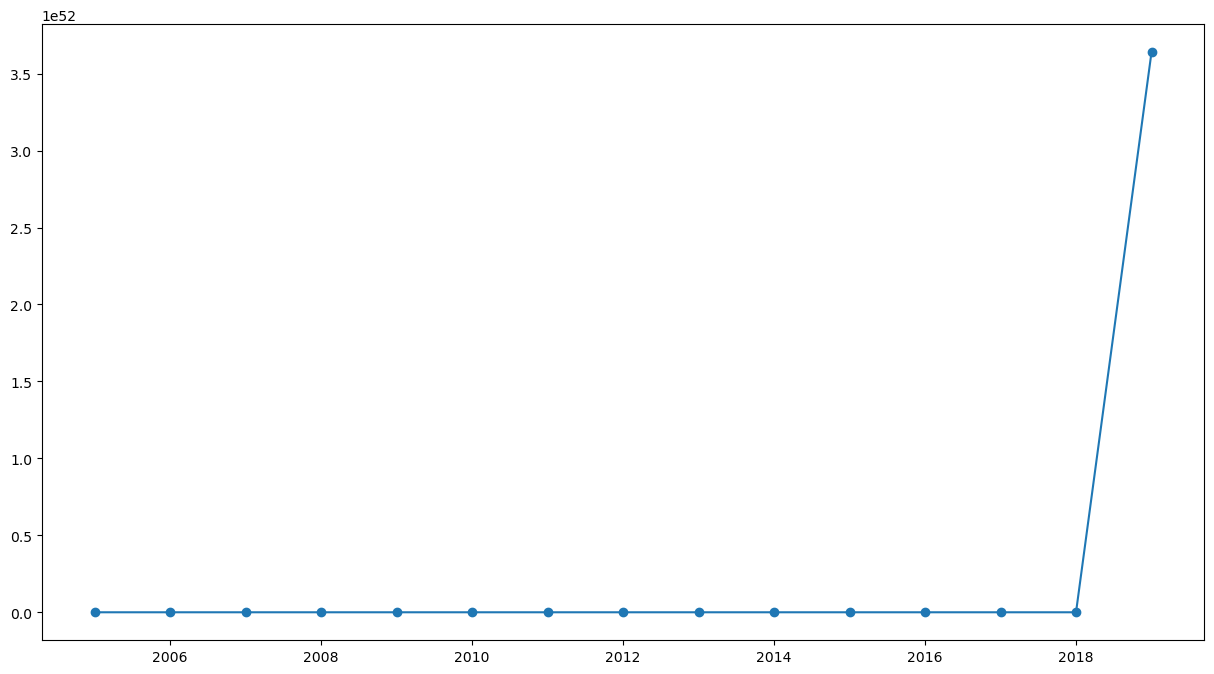

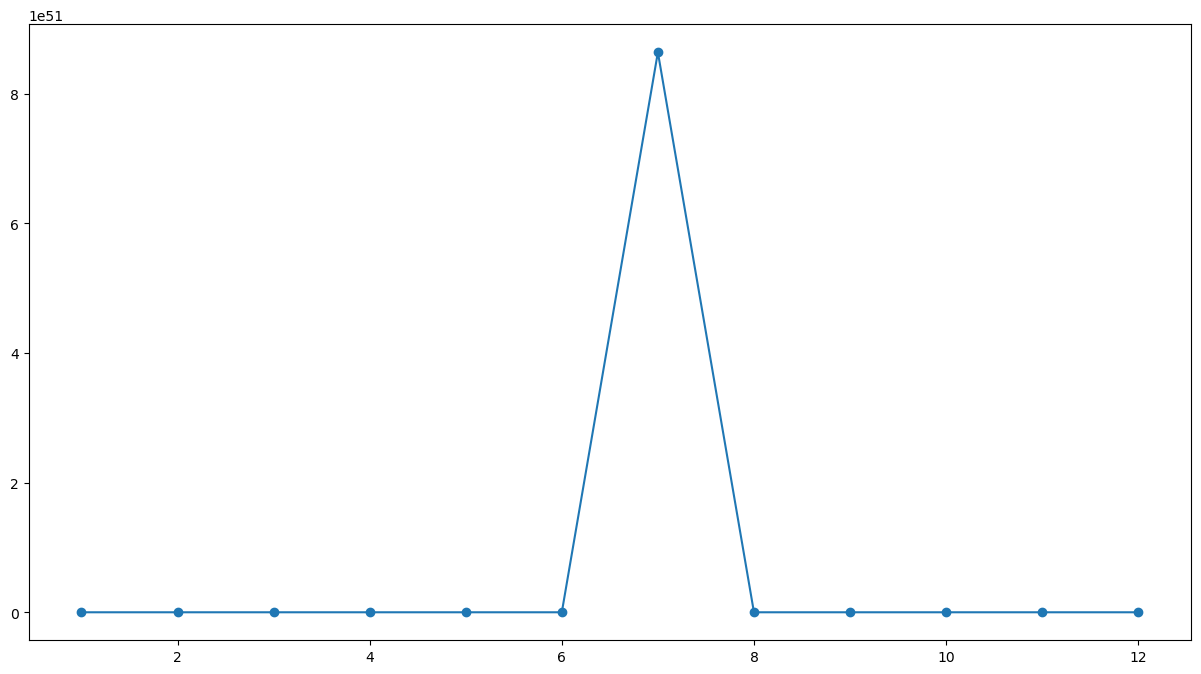

In [100]:
#3
data = pd.read_csv("NAMORS_EC_2005-2019.csv")  
#Null removal
data = data.dropna()
#Converts the date to datetime format
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d") 
#Remove untrusted values of 
data_h2o = data[data['qc_h2o_flux'] != 1]  
#Find the yearly average h2o_flux
year = data_h2o.groupby(data_h2o['date'].dt.year)['h2o_flux'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year, marker='o')  
plt.show()
#Find the monthly average h2o_flux
months = data_h2o.groupby(data_h2o['date'].dt.month)['h2o_flux'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months, marker='o') 
plt.show()

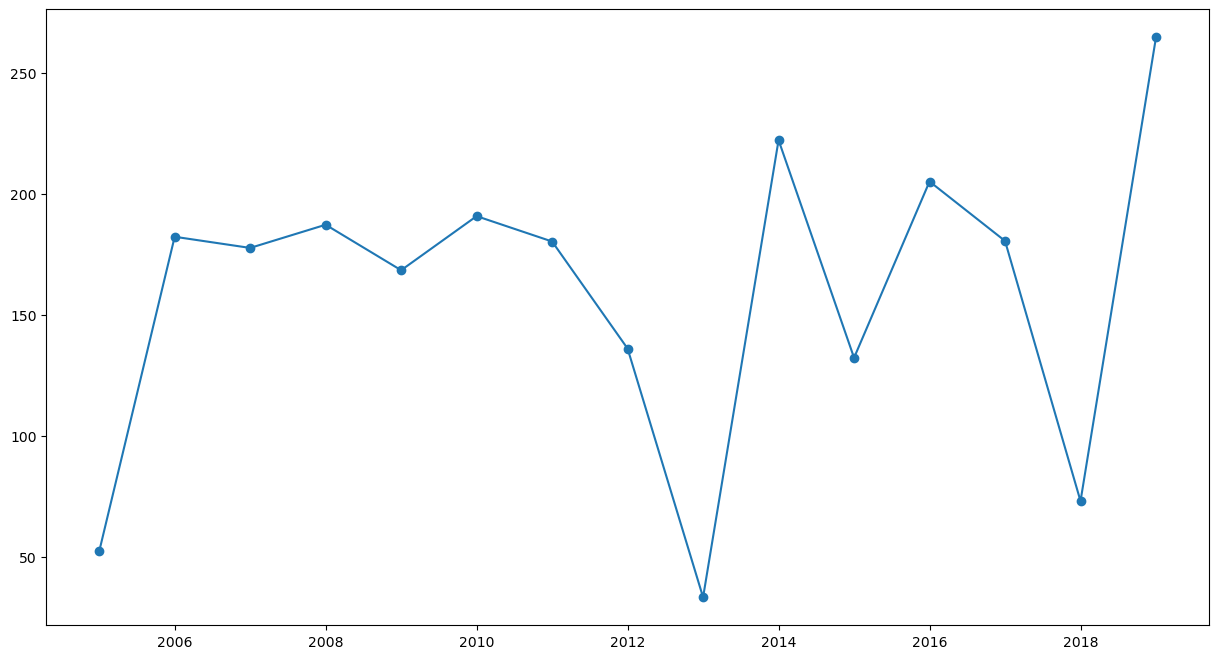

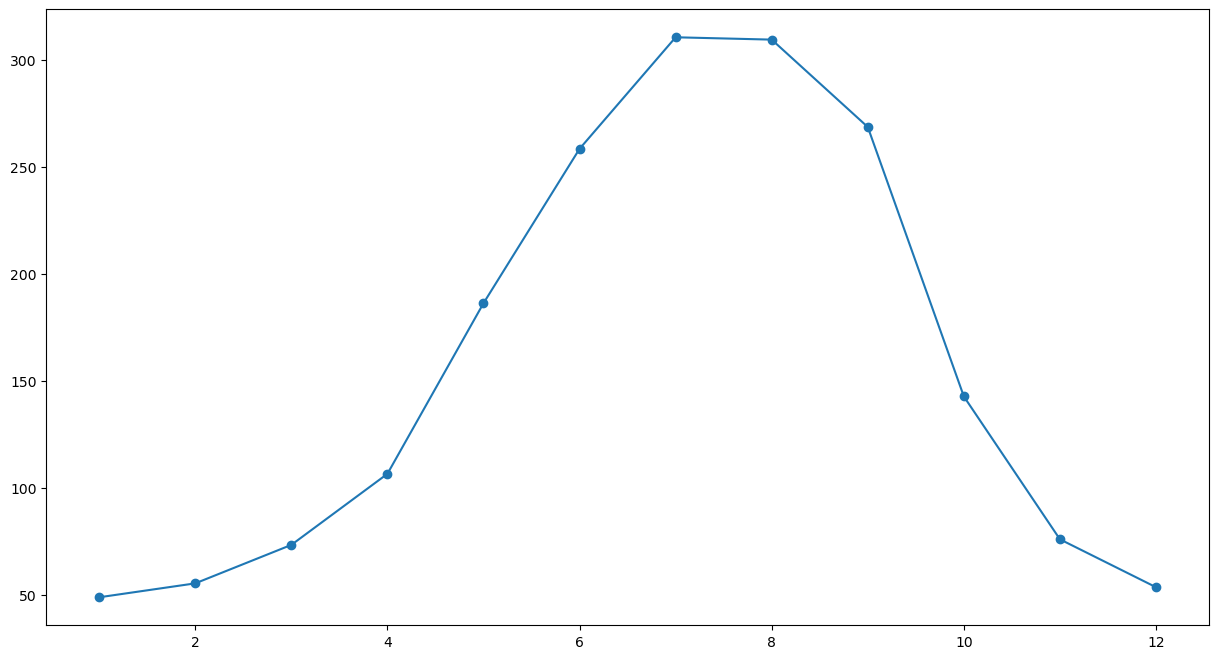

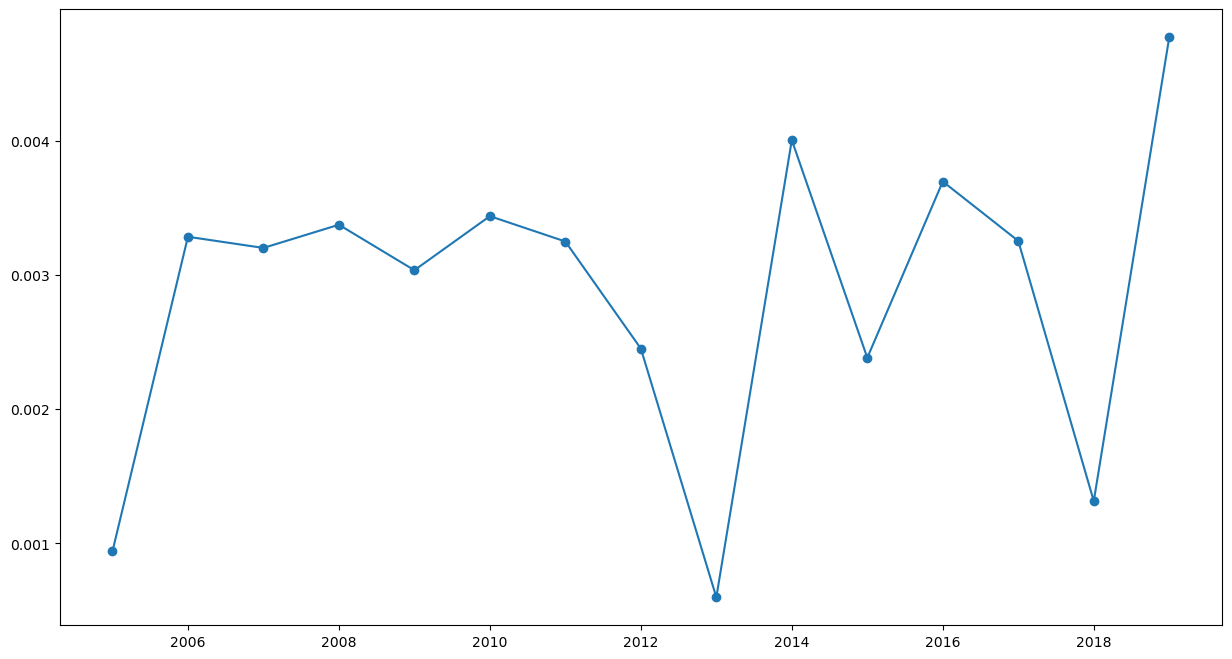

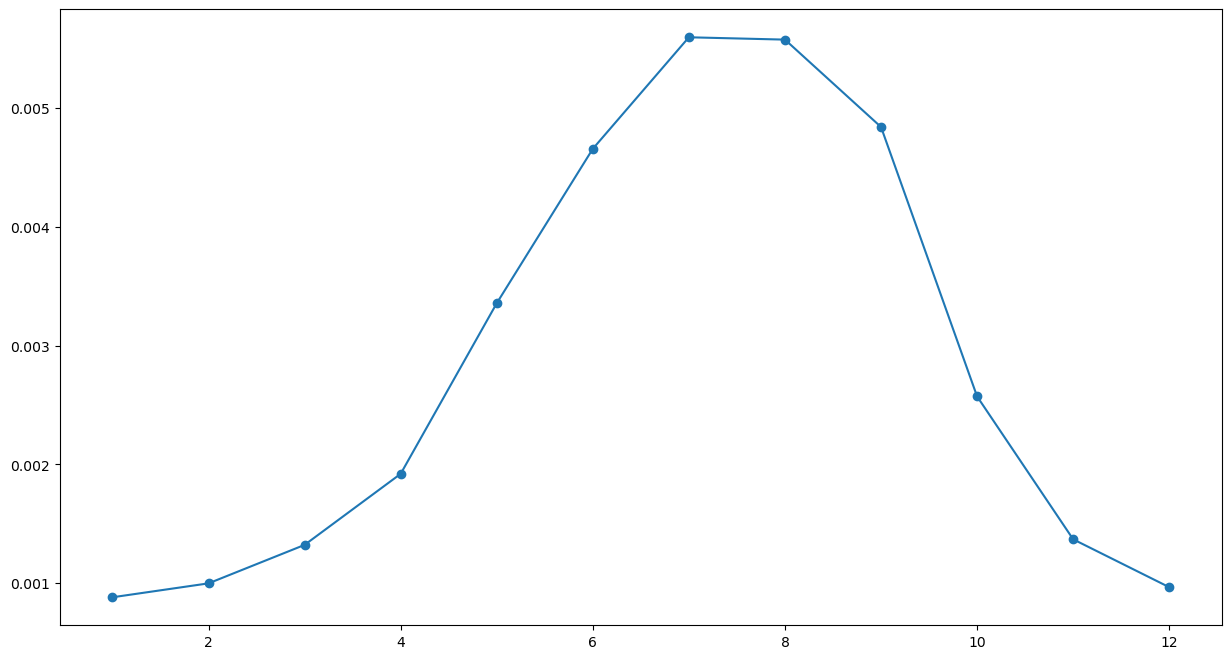

In [101]:
#Find the yearly average h2o_molar_density
year1 = data_h2o.groupby(data_h2o['date'].dt.year)['h2o_molar_density'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year1, marker='o')  
plt.show() 
#Find the monthly average h2o_molar_density
months1 = data_h2o.groupby(data_h2o['date'].dt.month)['h2o_molar_density'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months1, marker='o') 
plt.show()
#Find the yearly average water_vapor_density
data_h2o['water_vapor_density'] = data_h2o['water_vapor_density'].astype(float)
year2 = data_h2o.groupby(data_h2o['date'].dt.year)['water_vapor_density'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year2, marker='o')  
plt.show() 
#Find the monthly average water_vapor_density
months2 = data_h2o.groupby(data_h2o['date'].dt.month)['water_vapor_density'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months2, marker='o') 
plt.show()
#h2o_molar_density and water_vapor_density fluctuate greatly with the year but have no obvious upward or downward trend,
#while they are higher in summer and lower in winter.

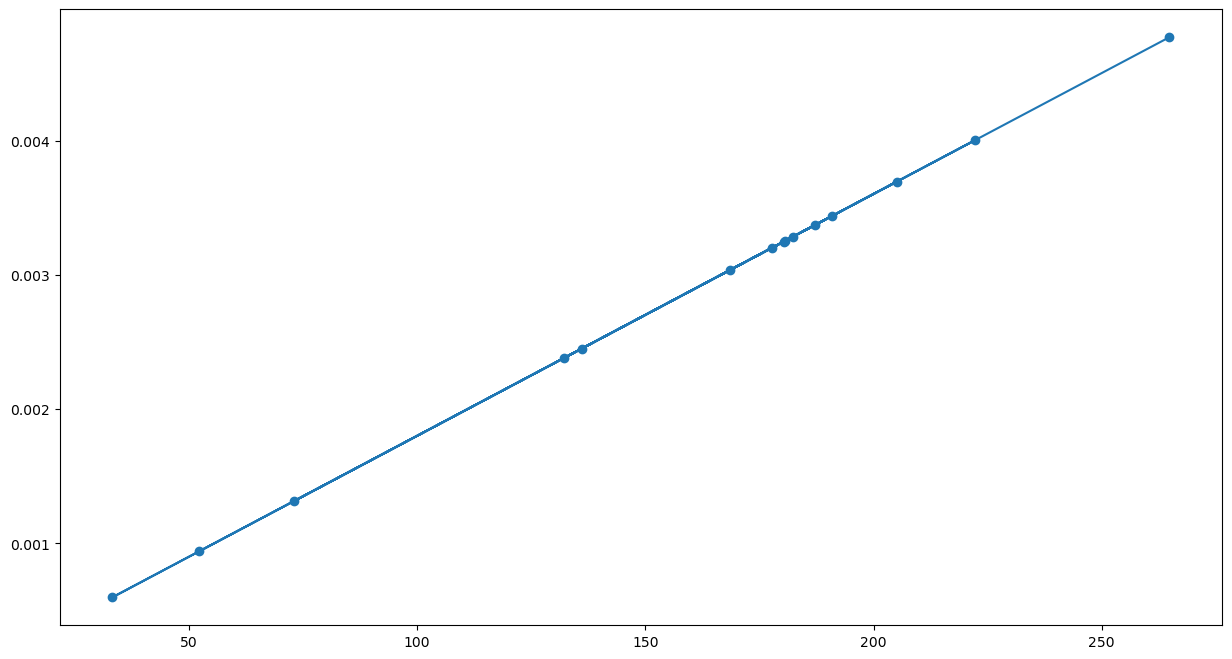

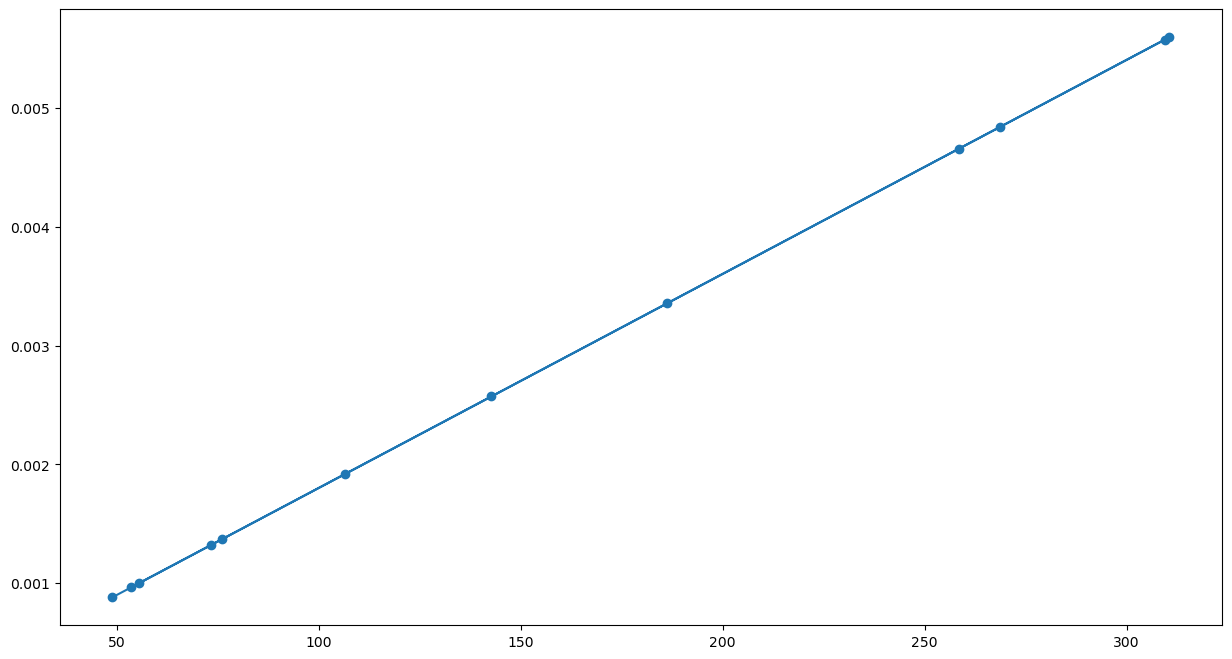

In [102]:
plt.figure(figsize=(15, 8))    
plt.plot(year1, year2, marker='o')  
plt.show() 
plt.figure(figsize=(15,8))  
plt.plot(months1, months2, marker='o') 
plt.show()
#h2o_molar_density and water_vapor_density have monthly and annual correlations